In [1]:
import tensorflow as tf
import tensorflow.keras as tensorflow_keras
from tensorflow.keras.utils import plot_model
from tensorflow import math
from tensorflow.random import normal as normal_tensorflow
import numpy as np
from src.shared import dataset_utils as du
import os
%matplotlib inline
import matplotlib.pyplot as plt

if not os.path.exists("tmp/dataset"):
	os.makedirs("tmp/dataset")
if not os.path.exists("tmp/dataset/models"):
	os.makedirs("tmp/dataset/models")


2024-10-24 13:41:37.531826: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-24 13:41:37.555183: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 13:41:37.555204: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 13:41:37.555855: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 13:41:37.559904: I tensorflow/core/platform/cpu_feature_guar

In [2]:
from src.shared import constants as c
print(c.PREPROCESS_MOBILENET)

True


# Data preprocessing

## Cifar 100

__IMPORTANT__ turn PREPROCESS_RESNET in src/shared/constants.py to True before executing this line

### IID: 20 NIID: 0

╭──────────────┬─────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬─────────

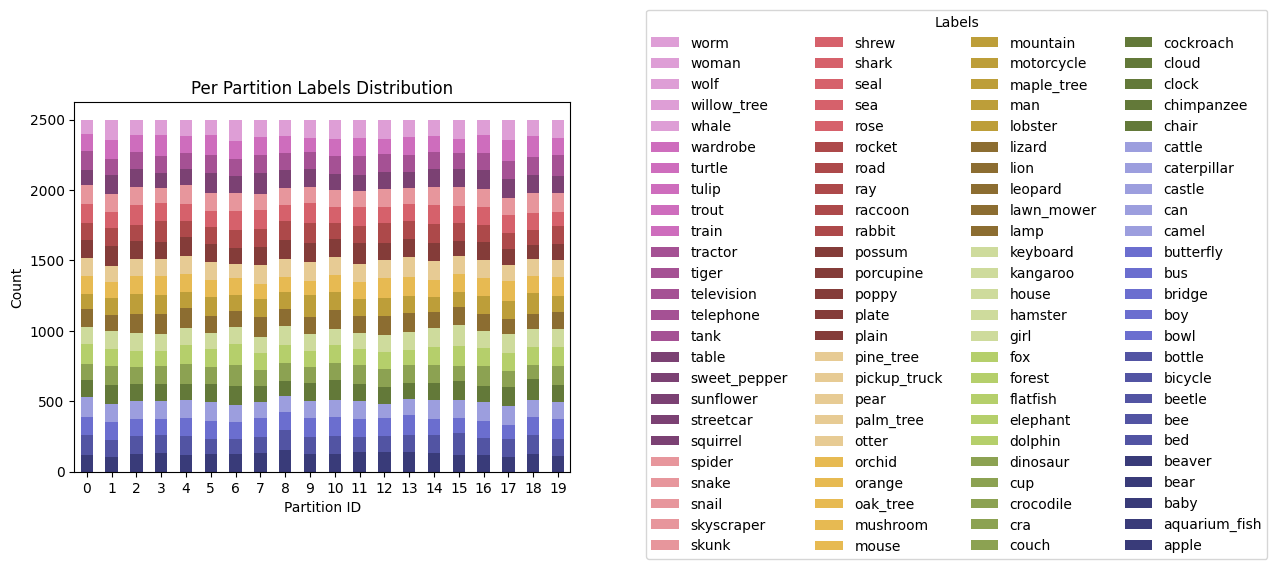

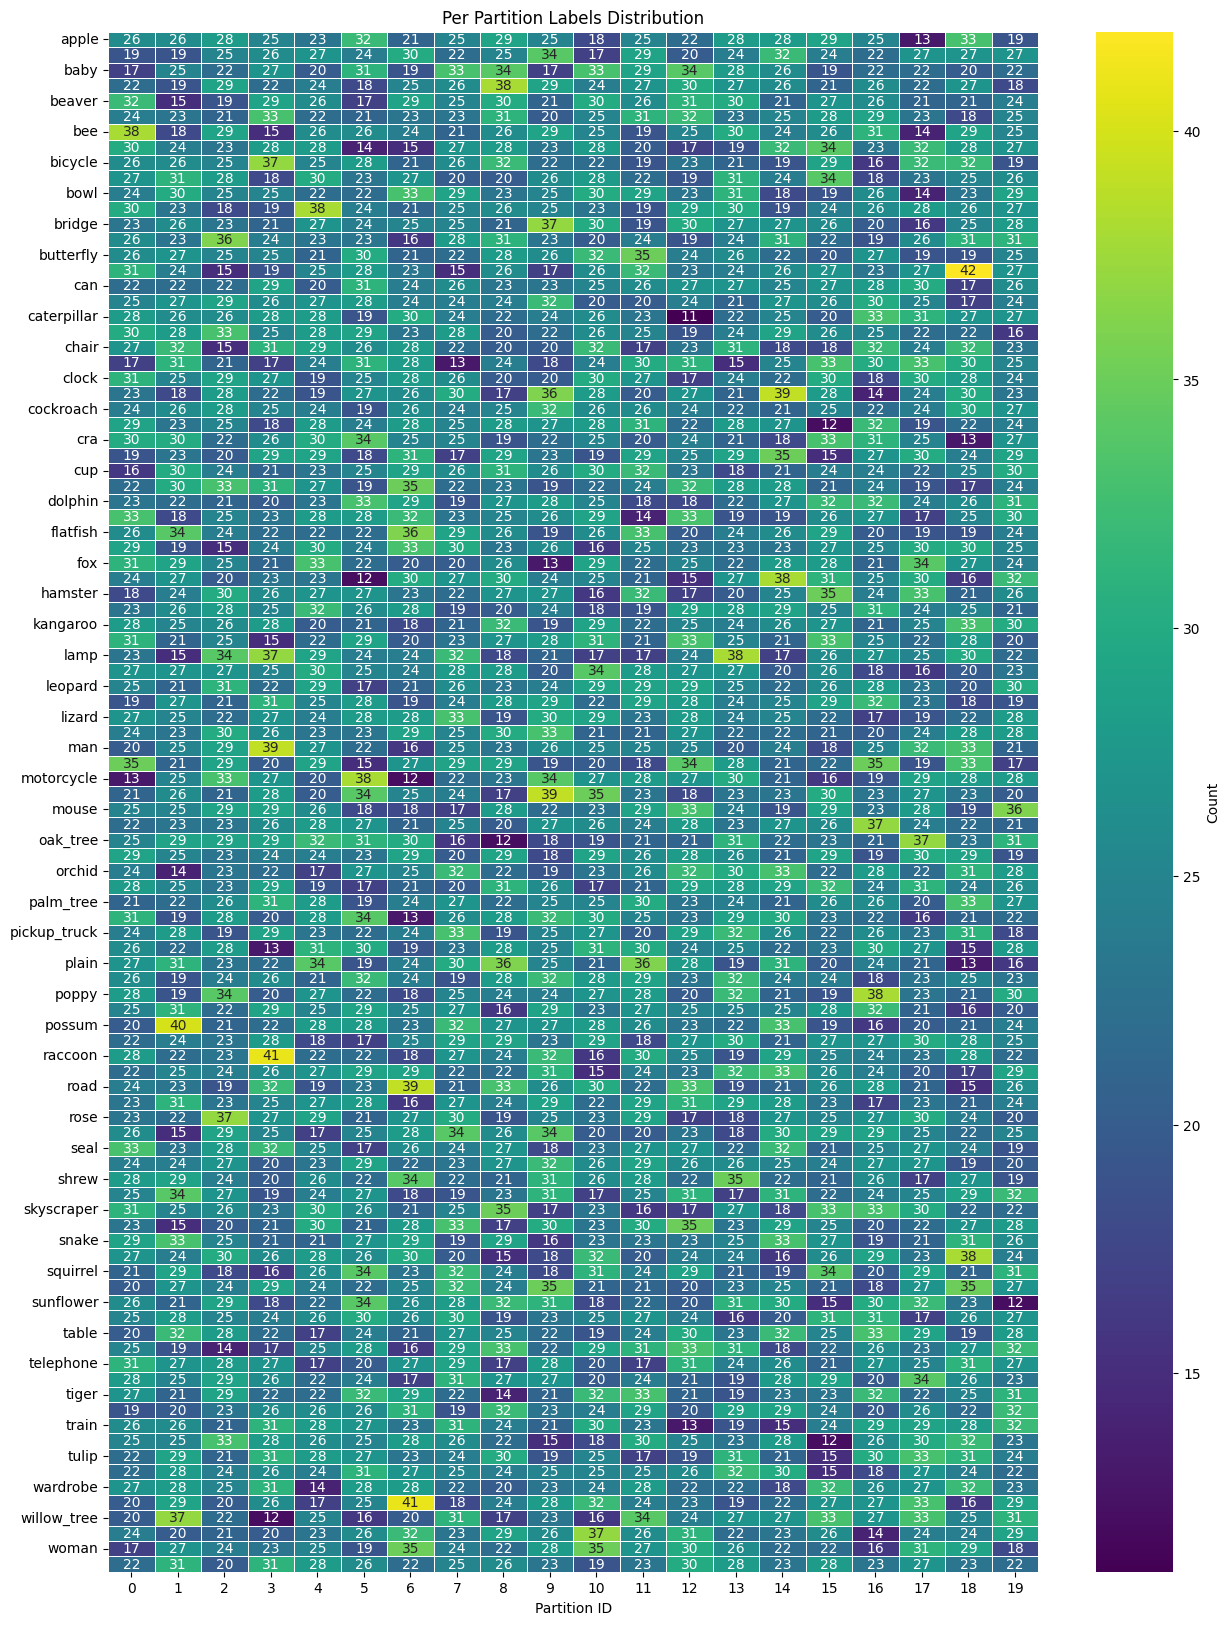

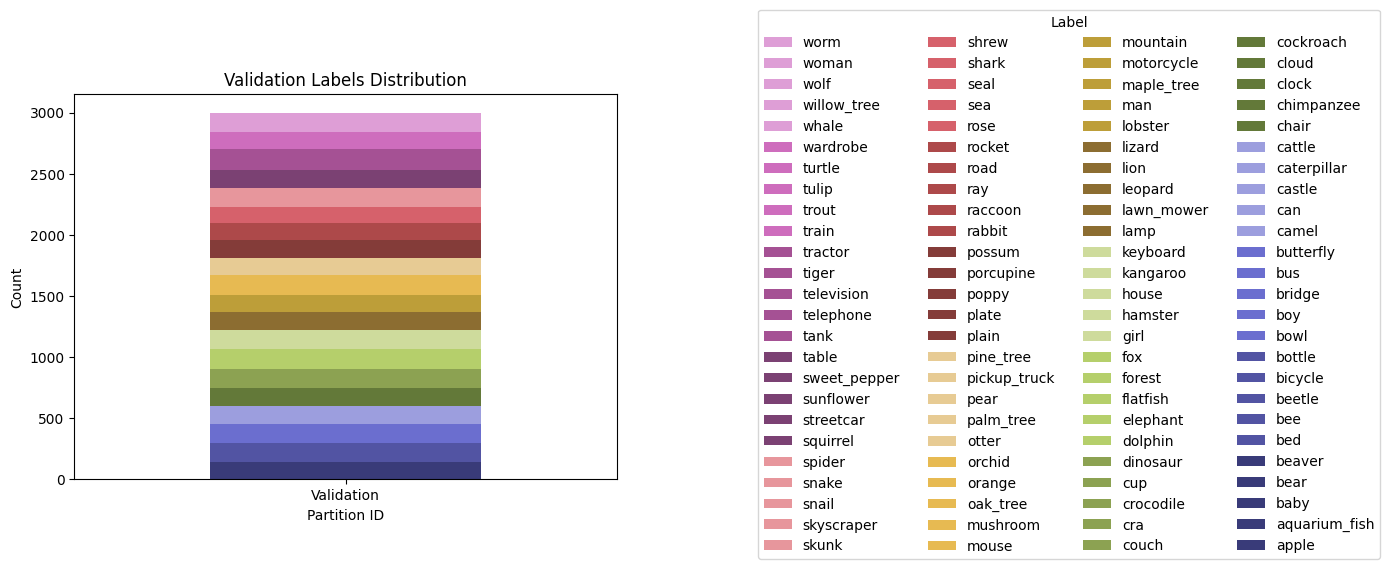

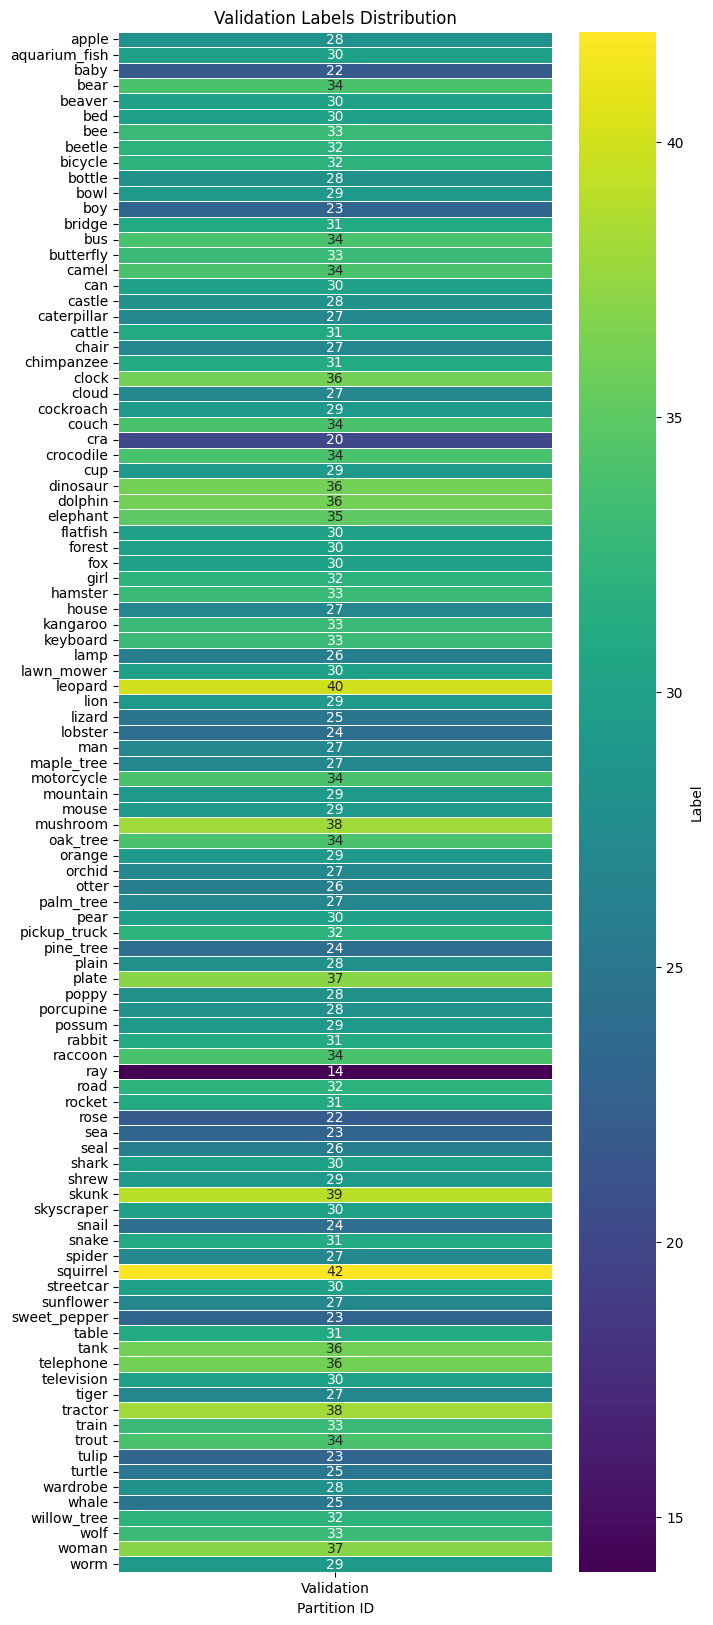

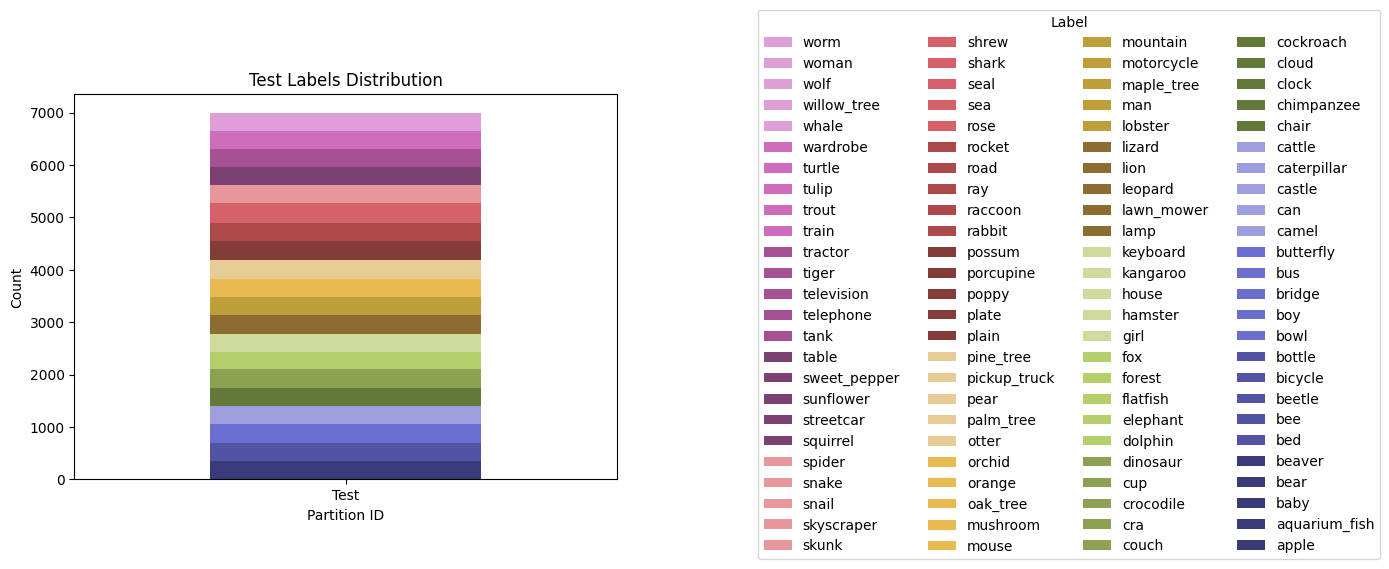

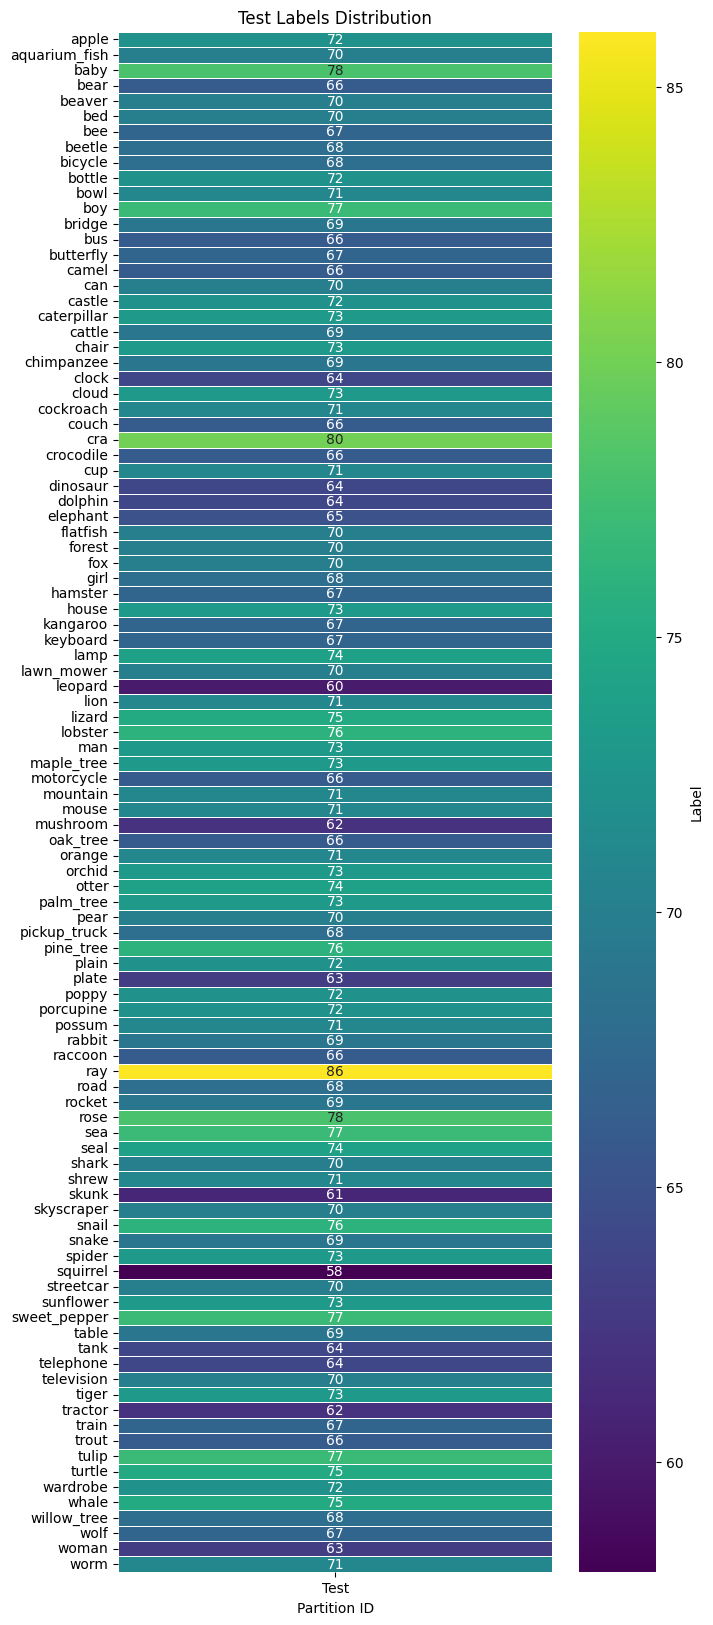

In [3]:
dataset_path = "cifar100"

quanta, testset, valset = du.quantize_dataset(
	dataset_path = dataset_path,
	num_quant = 20,
    show_info=True,
	temperature = 0.3,
	iid_percentage = 1,
)
quanta_paths, testset_path, valset_path = du.save_datasets(quanta, testset, valset, f"datasets/{dataset_path}_20_0")


### IID:0 NIID:20

╭──────────────┬─────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬─────────

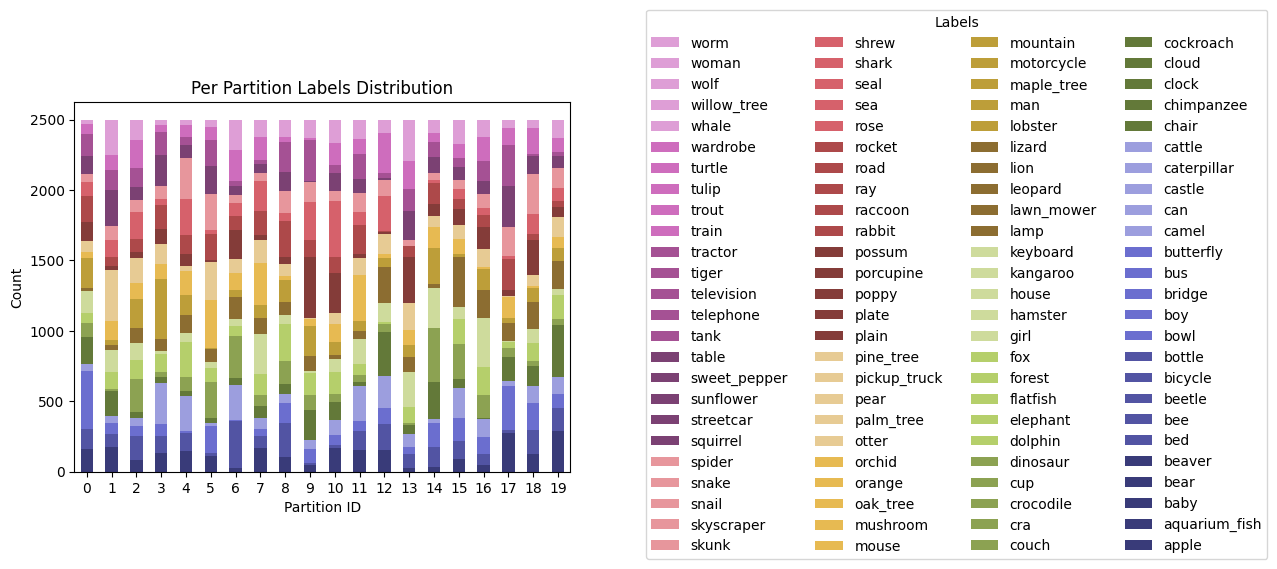

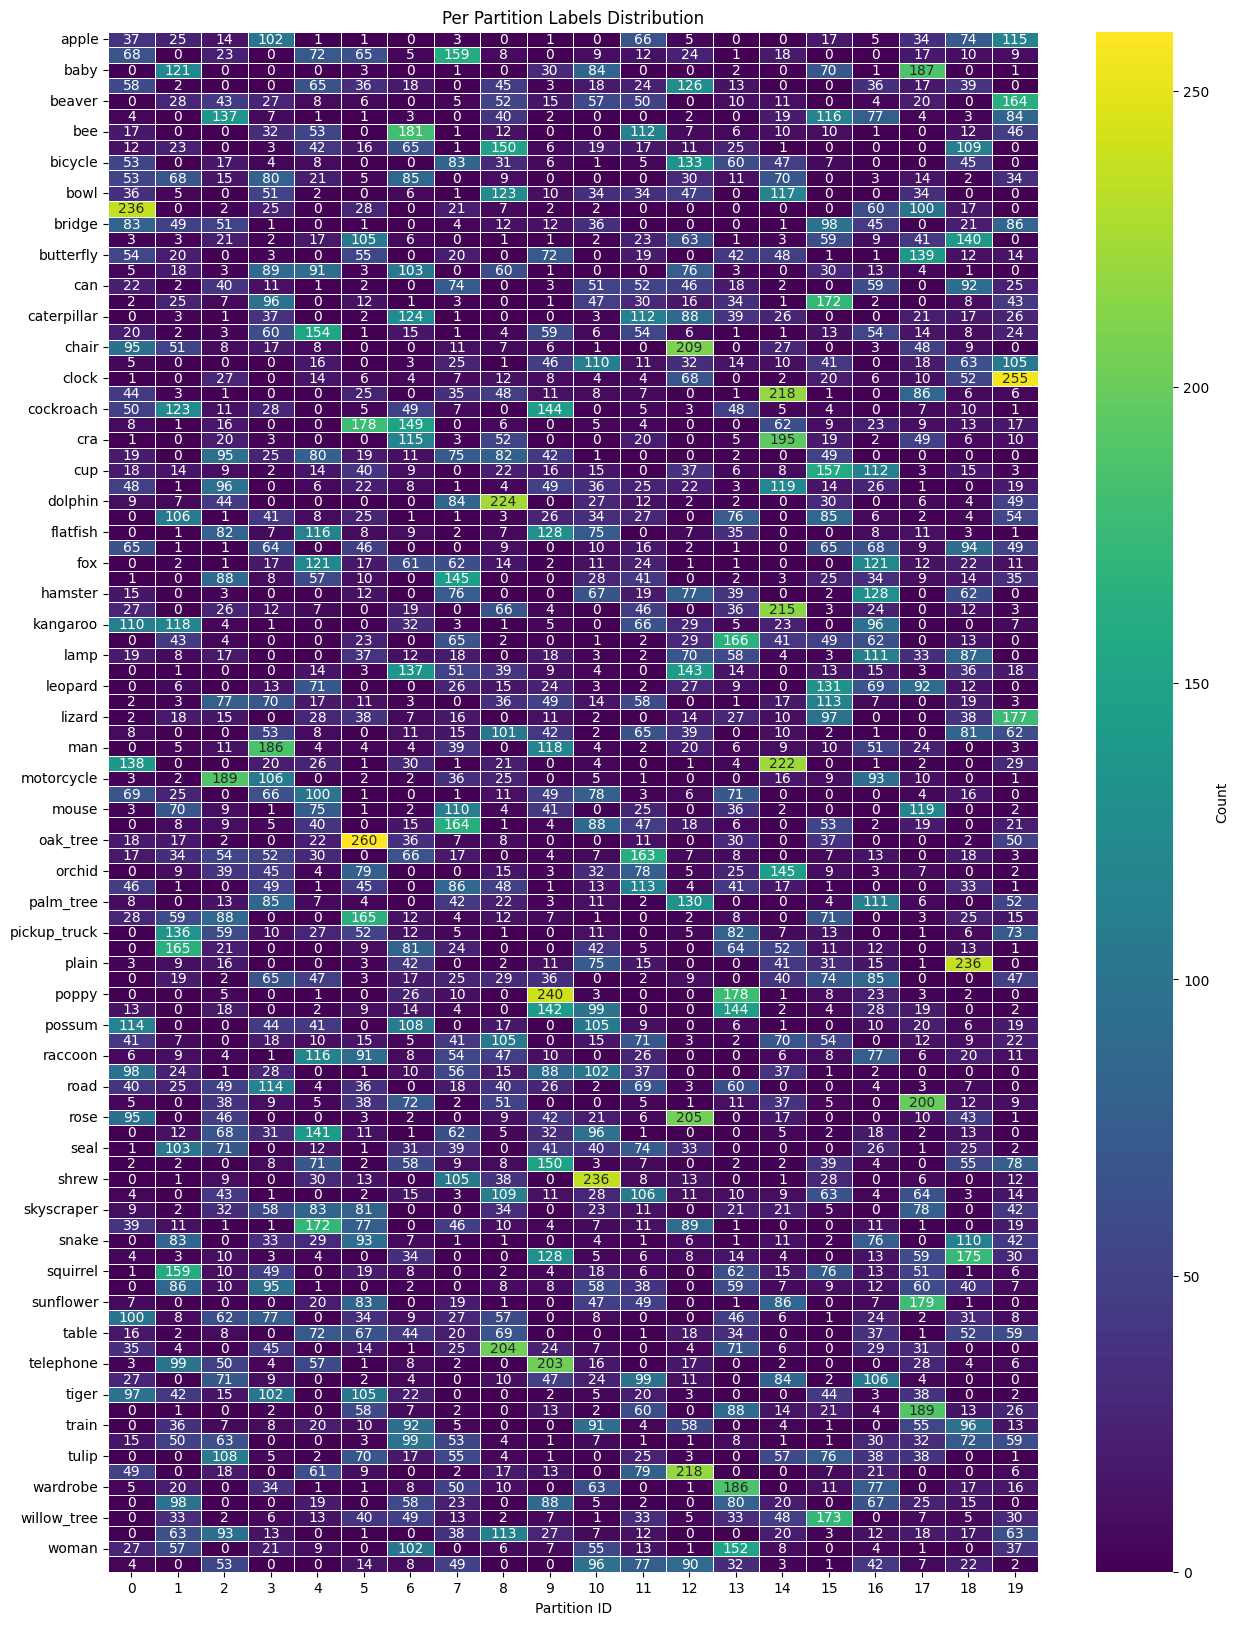

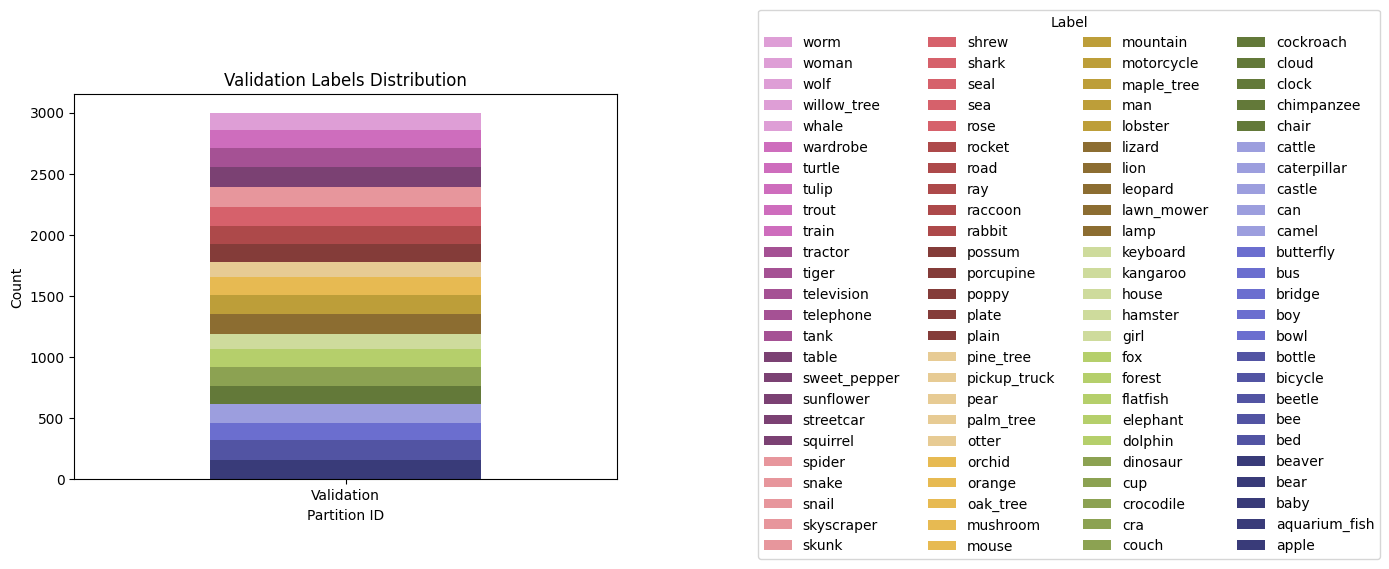

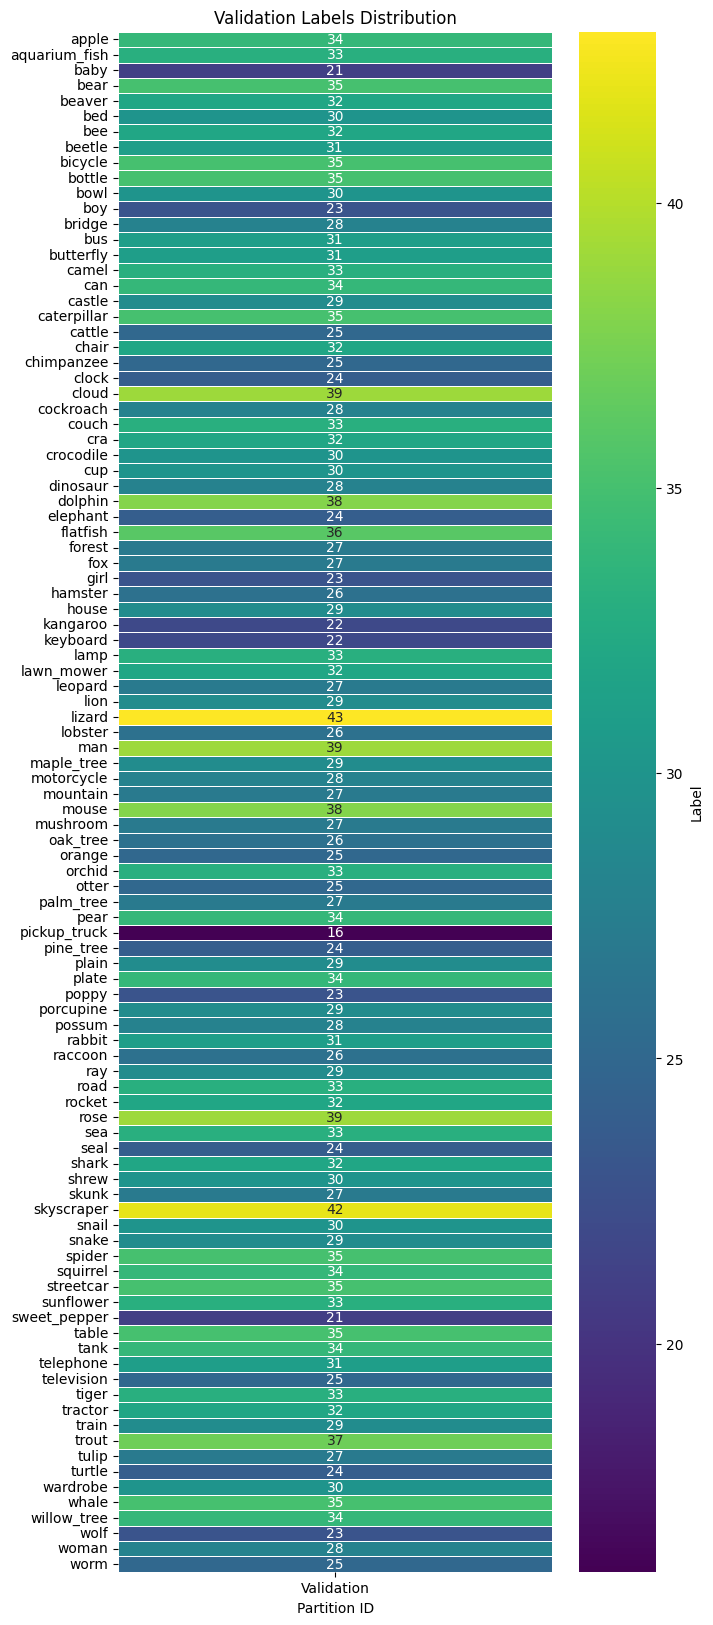

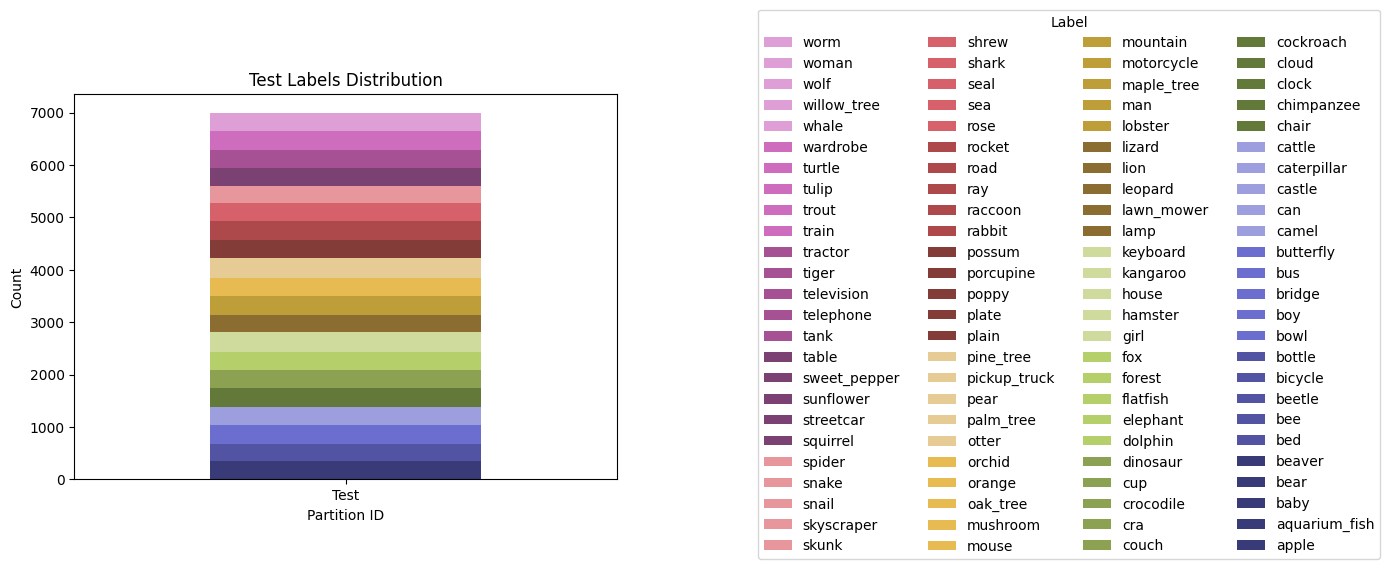

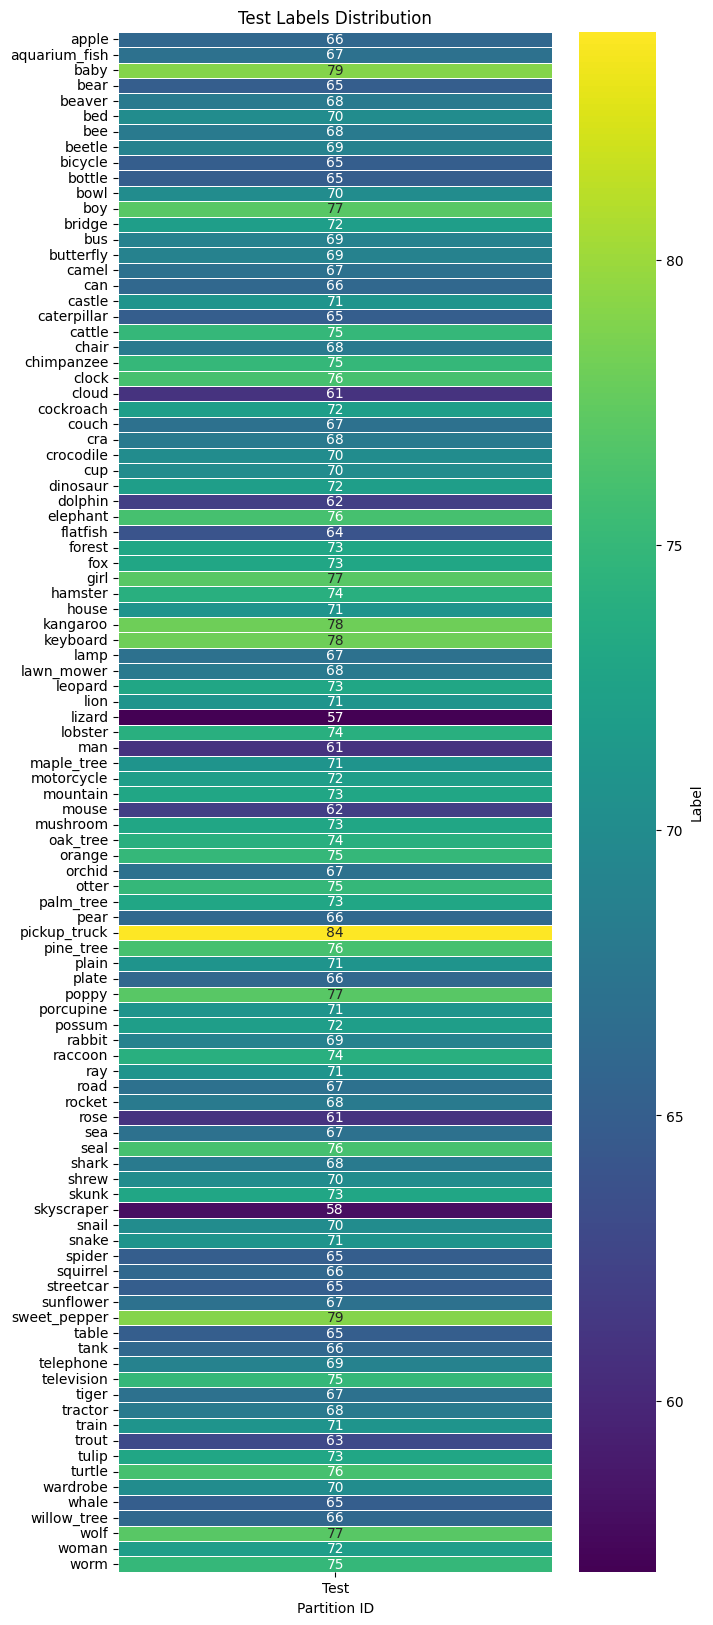

In [4]:
dataset_path = "cifar100"

quanta, testset, valset = du.quantize_dataset(
	dataset_path = dataset_path,
	num_quant = 20,
    show_info=True,
	temperature = 0.3,
	iid_percentage = 0,
)
quanta_paths, testset_path, valset_path = du.save_datasets(quanta, testset, valset, f"datasets/{dataset_path}_0_20")


## Cifar10

### IID: 20 NIID: 0

╭──────────────┬─────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────╮
│ Partition    │   Total │   Class 0 │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │   Class 6 │   Class 7 │   Class 8 │   Class 9 │
├──────────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Partition 0  │    2500 │       245 │       239 │       240 │       215 │       258 │       270 │       284 │       257 │       245 │       247 │
├──────────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Partition 1  │    2500 │       245 │       248 │       223 │       232 │       255 │       247 │       242 │       282 │       257 │       269 │
├──────────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼────────

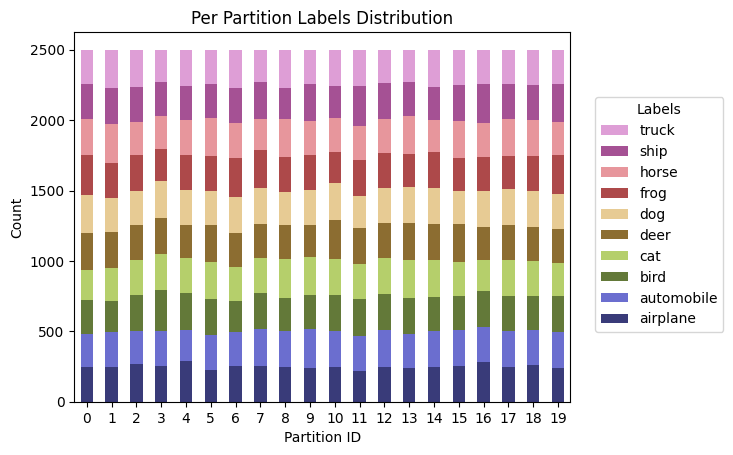

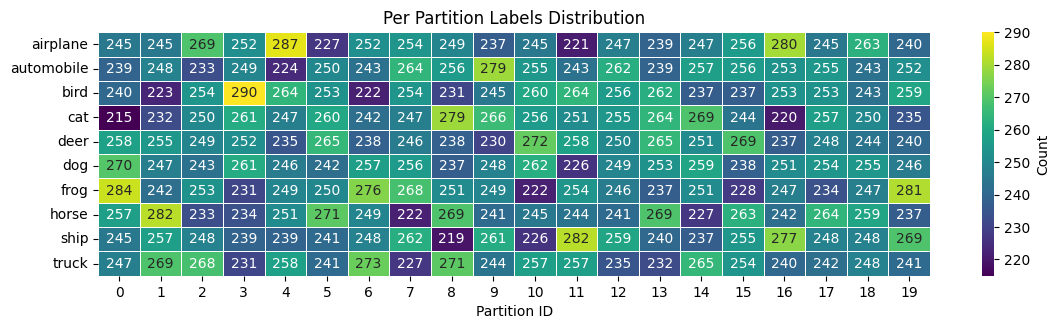

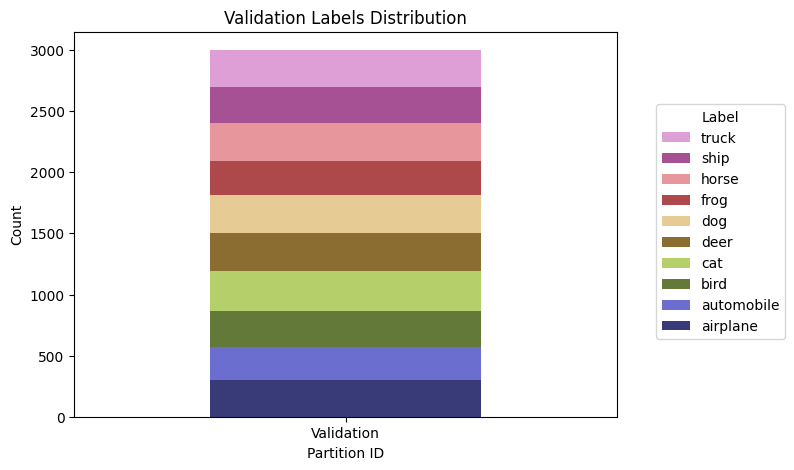

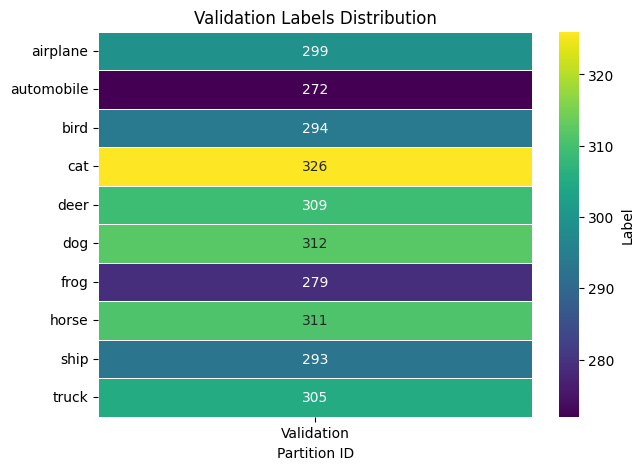

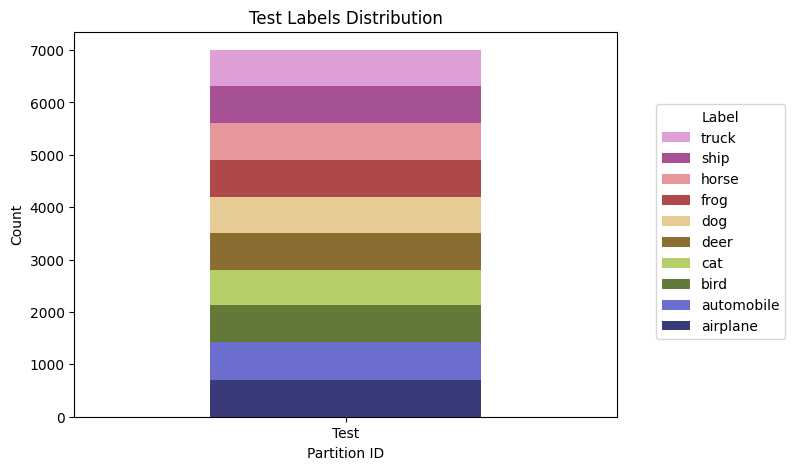

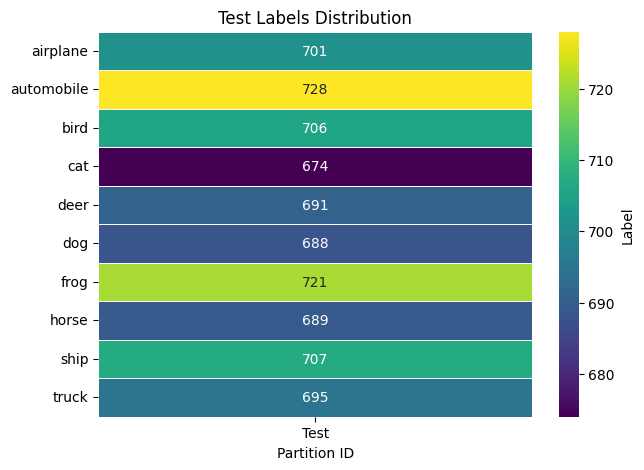

In [2]:
dataset_path = "cifar10"

quanta, testset, valset = du.quantize_dataset(
	dataset_path = dataset_path,
	num_quant = 20,
    show_info=True,
	temperature = 0.3,
	iid_percentage = 1,
)
quanta_paths, testset_path, valset_path = du.save_datasets(quanta, testset, valset, f"datasets/{dataset_path}_20_0")

### IID: 0 NIID: 20

╭──────────────┬─────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────╮
│ Partition    │   Total │   Class 0 │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │   Class 6 │   Class 7 │   Class 8 │   Class 9 │
├──────────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Partition 0  │    2500 │       318 │       624 │         1 │       403 │         1 │        51 │       429 │        37 │        86 │       550 │
├──────────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Partition 1  │    2500 │       166 │      1407 │       430 │         1 │       229 │        34 │       190 │         1 │         2 │        40 │
├──────────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼────────

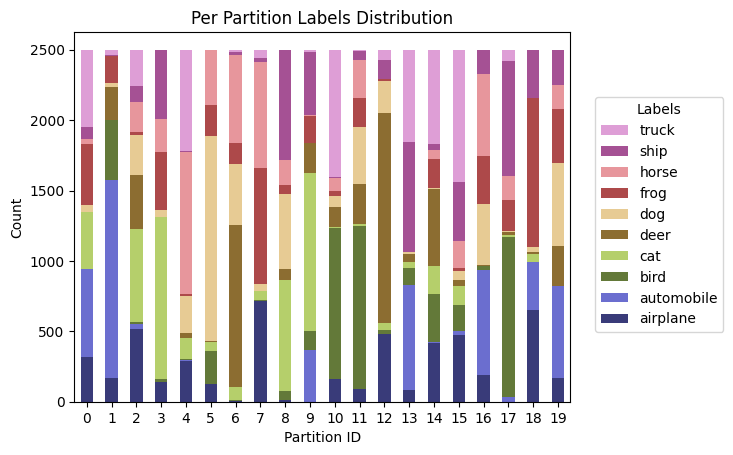

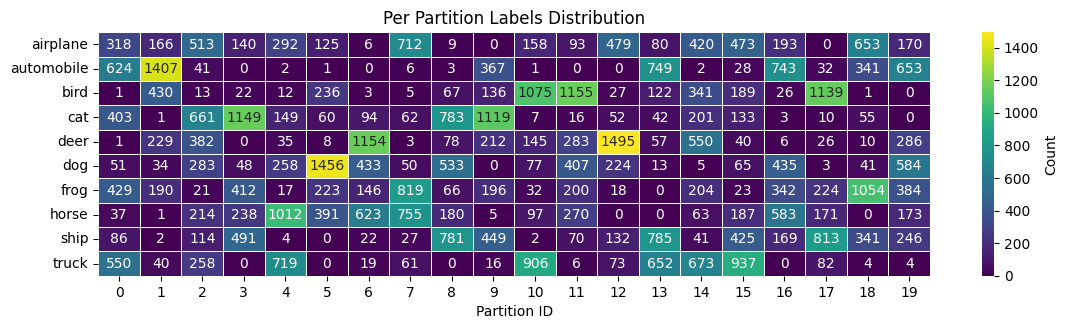

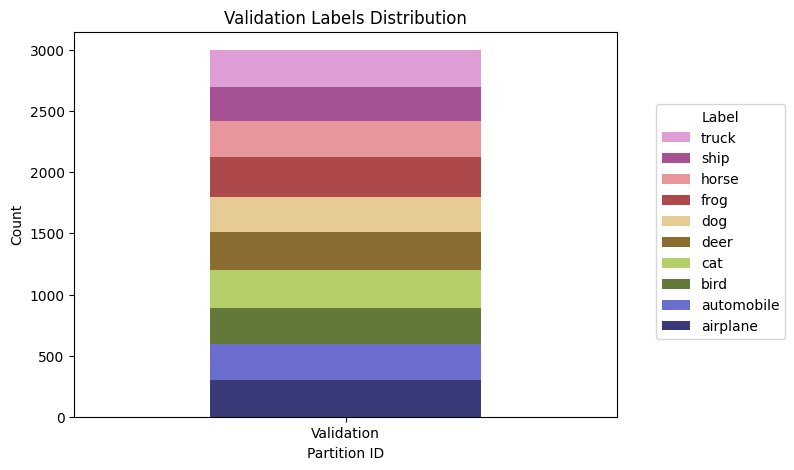

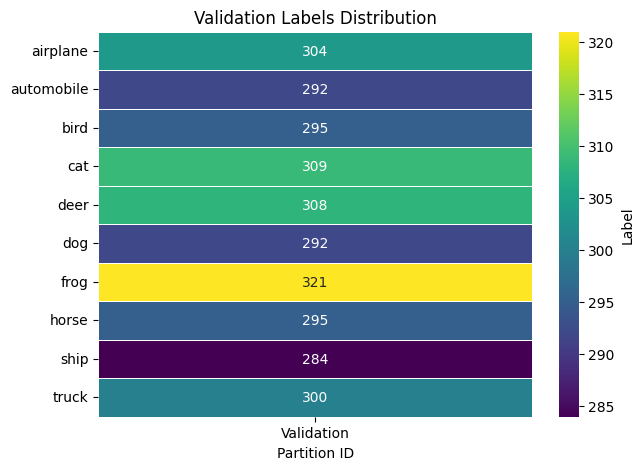

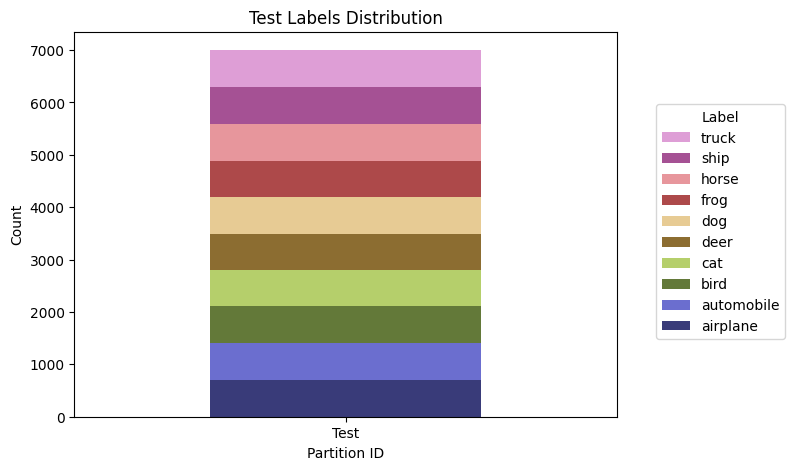

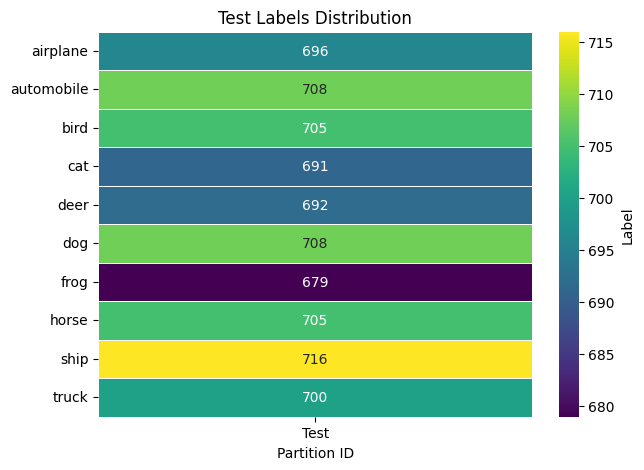

In [3]:
dataset_path = "cifar10"

quanta, testset, valset = du.quantize_dataset(
	dataset_path = dataset_path,
	num_quant = 20,
    show_info=True,
	temperature = 0.3,
	iid_percentage = 0,
)
quanta_paths, testset_path, valset_path = du.save_datasets(quanta, testset, valset, f"datasets/{dataset_path}_0_20")

## MNIST

### IID: 20 NIID: 0

Map:  14%|█▎        | 951/7000 [00:00<00:01, 4779.98 examples/s]/home/bleggif/anaconda3/envs/SimulatorFl/lib/python3.10/site-packages/datasets/features/image.py:339: UserWarning: Downcasting array dtype int64 to uint8 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
Map: 100%|██████████| 3000/3000 [00:11<00:00, 258.67 examples/s]


╭──────────────┬─────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────╮
│ Partition    │   Total │   Class 0 │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │   Class 6 │   Class 7 │   Class 8 │   Class 9 │
├──────────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Partition 0  │    3000 │       294 │       316 │       299 │       318 │       292 │       258 │       294 │       313 │       309 │       307 │
├──────────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Partition 1  │    3000 │       310 │       359 │       298 │       326 │       295 │       250 │       295 │       295 │       299 │       273 │
├──────────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼────────

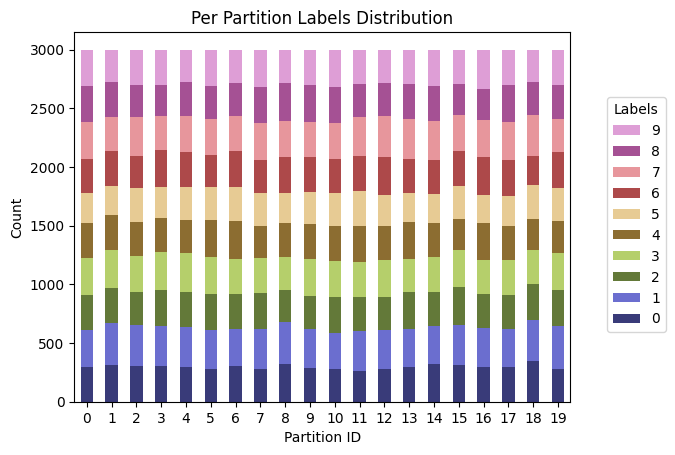

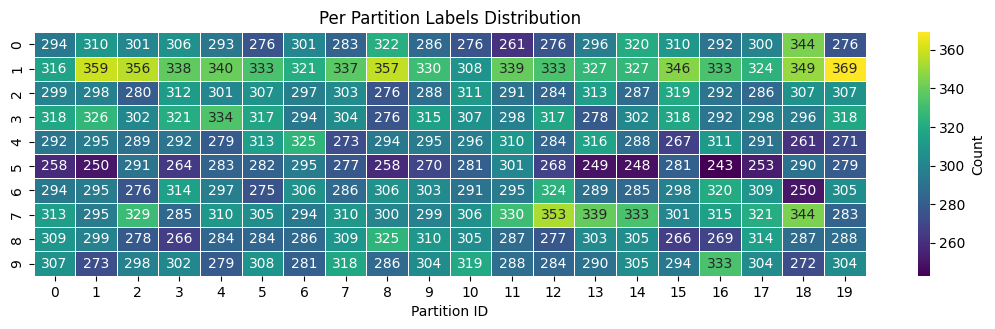

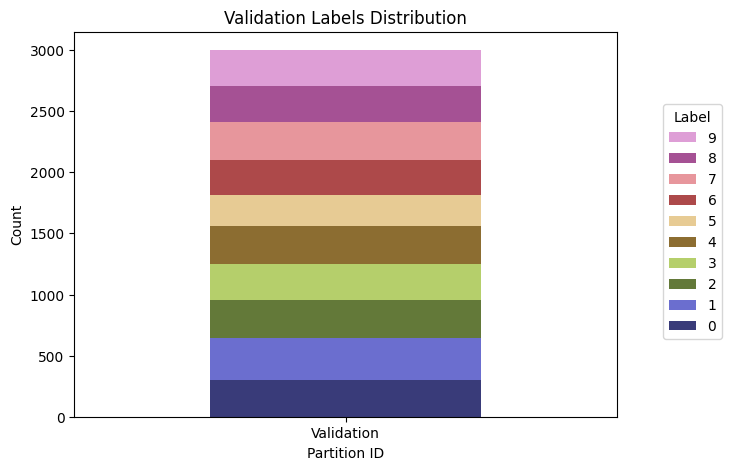

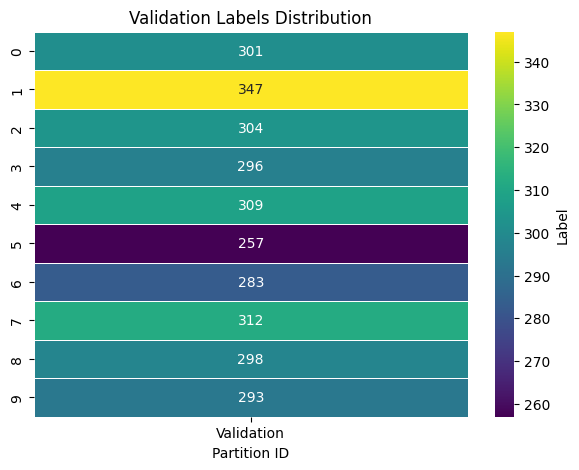

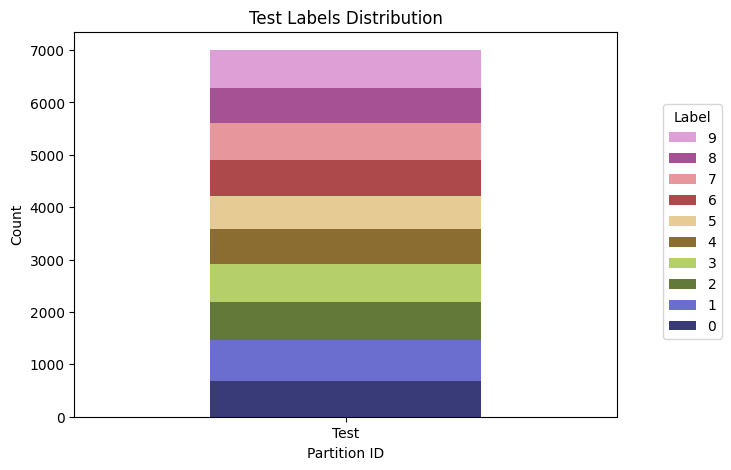

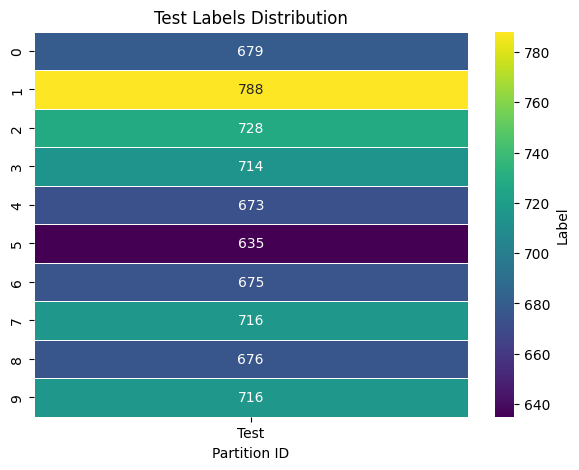

In [4]:
dataset_path = "mnist"

quanta, testset, valset = du.quantize_dataset(
	dataset_path = dataset_path,
	num_quant = 20,
    show_info=True,
	temperature = 0.3,
	iid_percentage = 1,
)
quanta_paths, testset_path, valset_path = du.save_datasets(quanta, testset, valset, f"datasets/{dataset_path}_20_0")

### IID: 0 NIID: 20

Map:   7%|▋         | 488/7000 [00:00<00:01, 4858.53 examples/s]/home/bleggif/anaconda3/envs/SimulatorFl/lib/python3.10/site-packages/datasets/features/image.py:339: UserWarning: Downcasting array dtype int64 to uint8 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
Map: 100%|██████████| 3000/3000 [00:11<00:00, 252.45 examples/s]


╭──────────────┬─────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────╮
│ Partition    │   Total │   Class 0 │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │   Class 6 │   Class 7 │   Class 8 │   Class 9 │
├──────────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Partition 0  │    3000 │       374 │       816 │         0 │       469 │         1 │        57 │       497 │        49 │        97 │           │
├──────────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Partition 1  │    3000 │       196 │      1838 │       416 │         1 │       239 │        28 │       246 │         1 │         2 │        33 │
├──────────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼────────

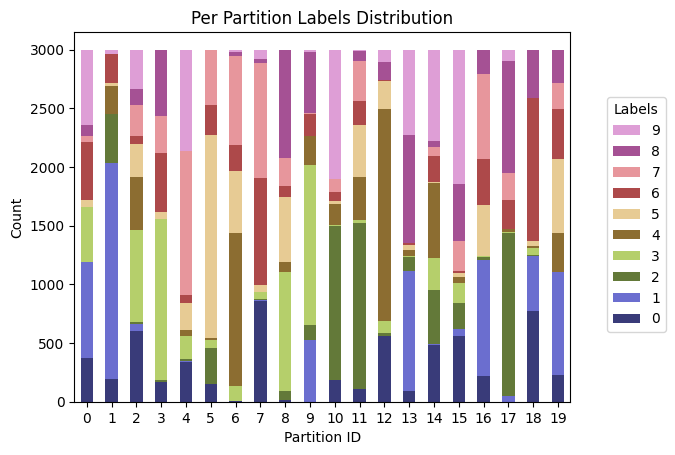

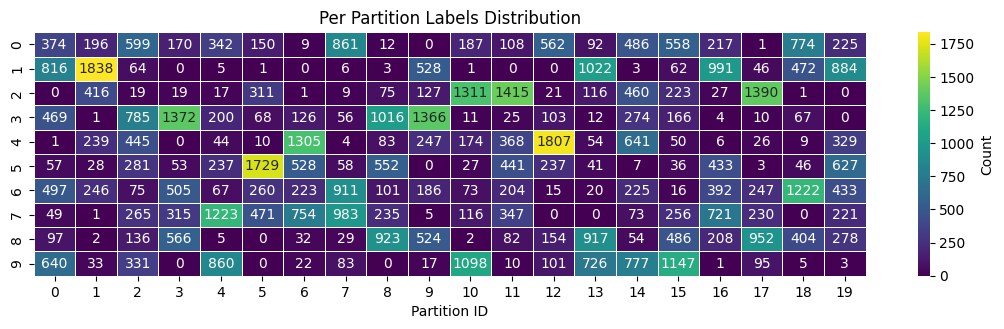

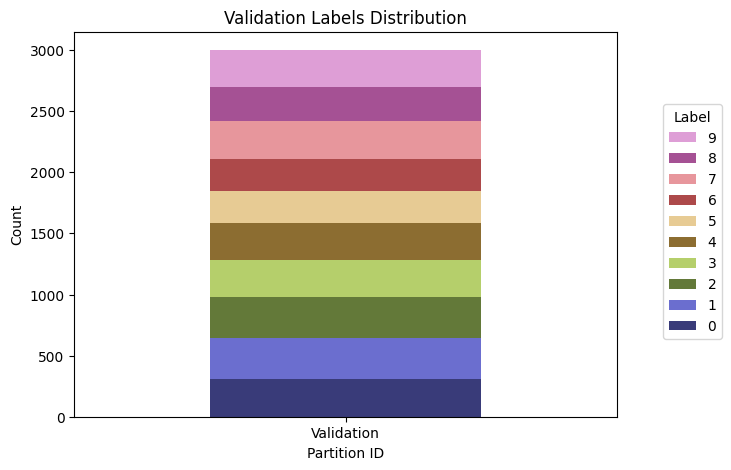

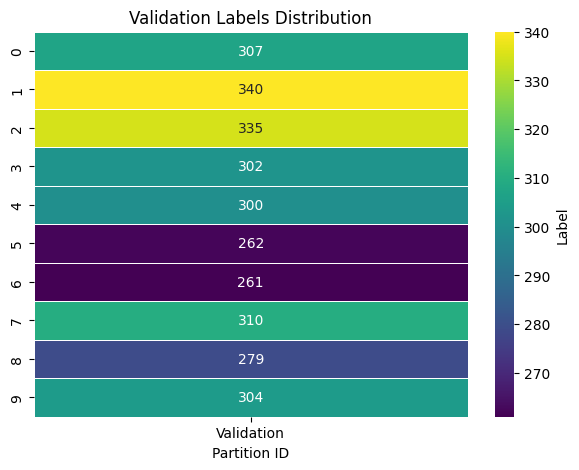

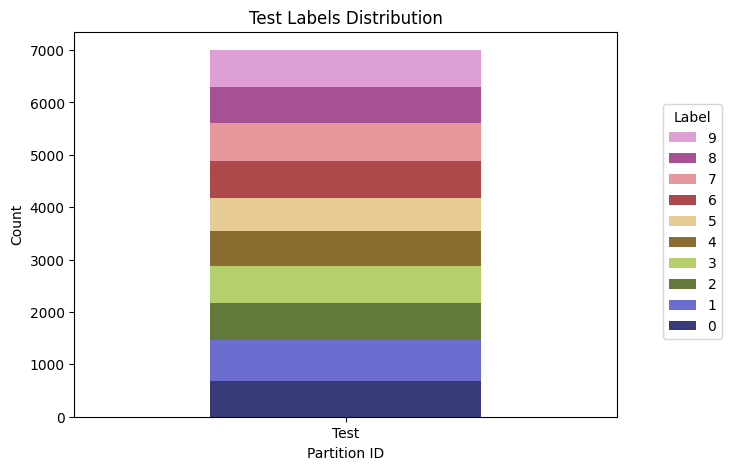

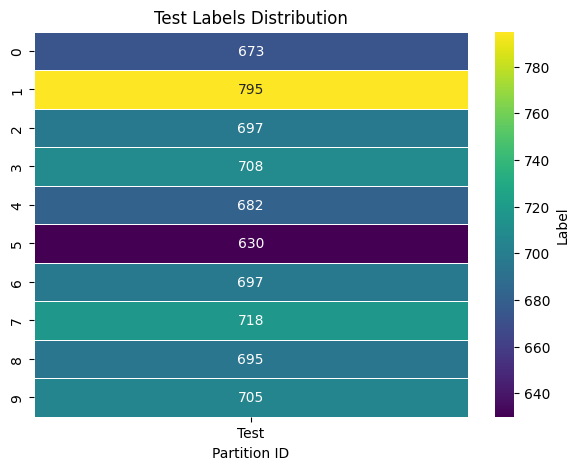

In [5]:
dataset_path = "mnist"

quanta, testset, valset = du.quantize_dataset(
	dataset_path = dataset_path,
	num_quant = 20,
    show_info=True,
	temperature = 0.3,
	iid_percentage = 0,
)
quanta_paths, testset_path, valset_path = du.save_datasets(quanta, testset, valset, f"datasets/{dataset_path}_0_20")

# Models info

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                163850    
                                                                 
Total params: 165066 (644.79 KB)
Trainable params: 165066 (644.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


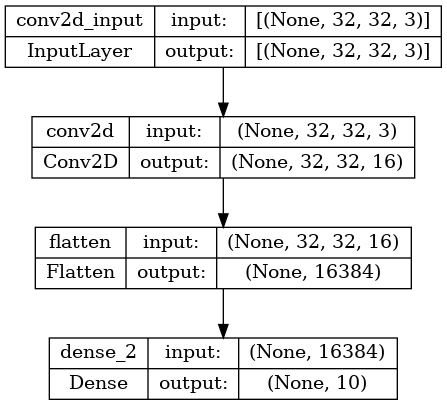

In [5]:
def get_cifar10_model():
	model = tensorflow_keras.models.Sequential()
	model.add(tensorflow_keras.layers.Conv2D(16, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
	model.add(tensorflow_keras.layers.Flatten())
	model.add(tensorflow_keras.layers.Dense(10, activation='softmax'))
	return model

model = get_cifar10_model()
print(model.summary())
plot_model(model, to_file="tmp/dataset/models/cifar10.png", show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

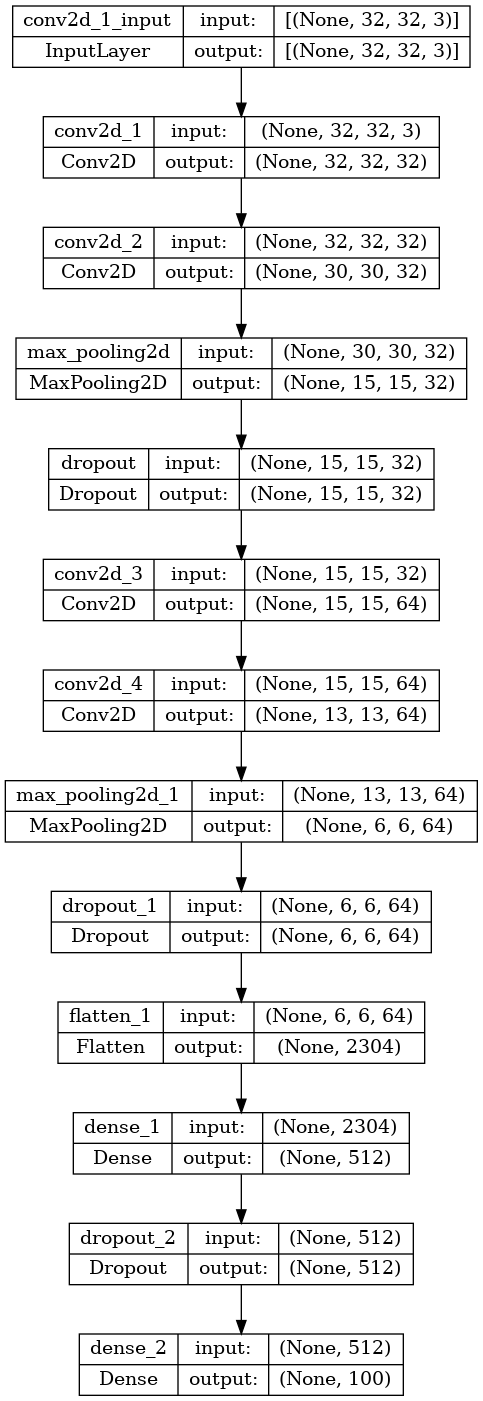

In [7]:
def get_cifar100_model():
	model = tensorflow_keras.models.Sequential()
	model.add(tensorflow_keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
	model.add(tensorflow_keras.layers.Conv2D(32, (3, 3), activation='relu'))
	model.add(tensorflow_keras.layers.MaxPooling2D(pool_size=(2, 2)))
	model.add(tensorflow_keras.layers.Dropout(0.25))

	model.add(tensorflow_keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
	model.add(tensorflow_keras.layers.Conv2D(64, (3, 3), activation='relu'))
	model.add(tensorflow_keras.layers.MaxPooling2D(pool_size=(2, 2)))
	model.add(tensorflow_keras.layers.Dropout(0.25))

	model.add(tensorflow_keras.layers.Flatten())
	model.add(tensorflow_keras.layers.Dense(512, activation='relu'))
	model.add(tensorflow_keras.layers.Dropout(0.5))
	model.add(tensorflow_keras.layers.Dense(100, activation='softmax'))
	return model

model = get_cifar100_model()
print(model.summary())
plot_model(model, to_file="tmp/dataset/models/cifar100.png", show_shapes=True, show_layer_names=True)

2024-10-11 00:16:50.003068: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-11 00:16:50.033364: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-11 00:16:50.033415: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-11 00:16:50.037563: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-11 00:16:50.037613: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1, 1, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
Total params: 2965156 (11.31 MB)
Trainable params: 1439652 (5.49 MB)
Non-trainable params: 1525504 (5.82 MB)
_________________________________________________________________
None


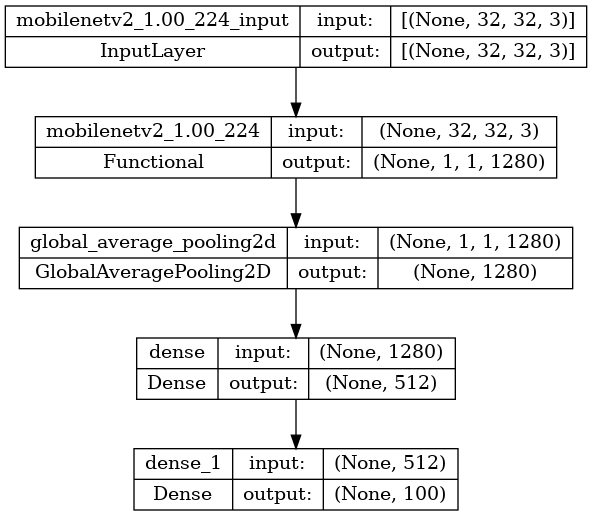

In [4]:
def get_pretrained_model():
	base_model = tensorflow_keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights="imagenet")
	# Add custom layers on top of ResNet50
	model = tensorflow_keras.models.Sequential()
	model.add(base_model)
	model.add(tensorflow_keras.layers.GlobalAveragePooling2D())
	model.add(tensorflow_keras.layers.Dense(512, activation='relu'))
	model.add(tensorflow_keras.layers.Dense(100, activation='softmax'))  # 100 classes for CIFAR-100
	# Freeze first until block_13_expand
	for layer in model.layers[0].layers:
		layer.trainable = False
	# Unfreeze the rest
	for layer in model.layers[0].layers[9*16:]:
		layer.trainable = True
	return model

base_model = tensorflow_keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
plot_model(base_model, to_file="tmp/dataset/models/MobileNetV2.png", show_shapes=True, show_layer_names=True)
model = get_pretrained_model()
print(model.summary())
plot_model(model, to_file="tmp/dataset/models/cifar100_pretrained_model.png", show_shapes=True, show_layer_names=True)

# Partition selector

Run at least one data preprocessing cells to retrieve the list of quanta paths

In [5]:
path_indexes = du.select_quanta_paths(quanta_paths, 1.0, 20, 20, show_info=True)
paths = [quanta_paths[i] for i in path_indexes]

Number of IID partitions: 20
Number of non-IID partitions: 0
Number of IID partitions to use: 20
Number of non-IID partitions to use: 0
Indexes of partitions to use: [13  1  3 18  7  5 12  0  9  2 10 19 16  8 15 17 11 14  6  4]
name of the partitions to use: ['datasets/cifar100_20_0/trainset_13.npz', 'datasets/cifar100_20_0/trainset_1.npz', 'datasets/cifar100_20_0/trainset_3.npz', 'datasets/cifar100_20_0/trainset_18.npz', 'datasets/cifar100_20_0/trainset_7.npz', 'datasets/cifar100_20_0/trainset_5.npz', 'datasets/cifar100_20_0/trainset_12.npz', 'datasets/cifar100_20_0/trainset_0.npz', 'datasets/cifar100_20_0/trainset_9.npz', 'datasets/cifar100_20_0/trainset_2.npz', 'datasets/cifar100_20_0/trainset_10.npz', 'datasets/cifar100_20_0/trainset_19.npz', 'datasets/cifar100_20_0/trainset_16.npz', 'datasets/cifar100_20_0/trainset_8.npz', 'datasets/cifar100_20_0/trainset_15.npz', 'datasets/cifar100_20_0/trainset_17.npz', 'datasets/cifar100_20_0/trainset_11.npz', 'datasets/cifar100_20_0/trainset_1

# Eager dataset

In [6]:
eager_dataset = du.create_composite_dataset_from_paths(paths, lazy_loading=False , batch_size=32, show_info=True)
test_set = du.load_npz_file(testset_path)

img_size = test_set['img'].nbytes / (1024 ** 2)  # Convert to MB
label_size = test_set['label'].nbytes / (1024 ** 2)  # Convert to MB

print(f"Loaded file: {testset_path}")
print(f"  img shape: {test_set['img'].shape}, label shape: {test_set['label'].shape}")
print(f"  img size: {img_size:.2f} MB, label size: {label_size:.2f} MB")

Loaded file: datasets/cifar100_20_0/trainset_13.npz
  img shape: (2500, 32, 32, 3), label shape: (2500,)
  img size: 29.30 MB, label size: 0.02 MB
Loaded file: datasets/cifar100_20_0/trainset_1.npz
  img shape: (2500, 32, 32, 3), label shape: (2500,)
  img size: 29.30 MB, label size: 0.02 MB
Loaded file: datasets/cifar100_20_0/trainset_3.npz
  img shape: (2500, 32, 32, 3), label shape: (2500,)
  img size: 29.30 MB, label size: 0.02 MB
Loaded file: datasets/cifar100_20_0/trainset_18.npz
  img shape: (2500, 32, 32, 3), label shape: (2500,)
  img size: 29.30 MB, label size: 0.02 MB
Loaded file: datasets/cifar100_20_0/trainset_7.npz
  img shape: (2500, 32, 32, 3), label shape: (2500,)
  img size: 29.30 MB, label size: 0.02 MB
Loaded file: datasets/cifar100_20_0/trainset_5.npz
  img shape: (2500, 32, 32, 3), label shape: (2500,)
  img size: 29.30 MB, label size: 0.02 MB
Loaded file: datasets/cifar100_20_0/trainset_12.npz
  img shape: (2500, 32, 32, 3), label shape: (2500,)
  img size: 29.30

# Lazy dataset

In [12]:
lazy_dataset = du.create_composite_dataset_from_paths(paths, lazy_loading=True , batch_size=32, show_info=False)
list(lazy_dataset.take(1))
test_set = du.create_dataset_from_npz([testset_path], batch_size=32, show_info=True)

# Label flipping dataset - Lazy

In [6]:
malicious_training_set = du.create_lazy_flipped_dataset(lazy_dataset, [0,4,8,9], [8,9,4,0], show_info=True)
_ = list(malicious_training_set.take(1))

  Original labels: [7. 3. 5. ... 5. 3. 0.]
  Flipped labels: [7. 3. 5. ... 5. 3. 8.]


# Label flipping dataset - Eager

In [6]:
malicious_training_set = du.create_eager_flipped_dataset(eager_dataset, [0,4], [8,9], 32, show_info=True)

  Original labels: [8 5 7 2 1 7 7 7 4 5 9 6 2 6 4 4 1 2 7 8 4 0 0 1 9 0 4 7 6 4 4 0]
  Original labels: [2 8 8 1 6 8 1 5 7 8 6 9 8 9 7 8 2 0 9 3 0 1 9 1 6 3 8 3 4 2 1 1]
Flipped labels: [8 5 7 2 1 7 7 7 9 5 9 6 2 6 9 9 1 2 7 8 9 8 8 1 9 8 9 7 6 9 9 8]
Flipped labels: [2 8 8 1 6 8 1 5 7 8 6 9 8 9 7 8 2 8 9 3 8 1 9 1 6 3 8 3 9 2 1 1]


# Random label flipping - Lazy

In [7]:
malicious_training_set = du.create_lazy_random_flipped_dataset(lazy_dataset, show_info=True)
_ = list(malicious_training_set.take(1))

  Original labels: [3. 1. 5. ... 1. 0. 0.]
  Random labels: [8 7 1 ... 7 5 5]


# Random label flipping - Eager

In [8]:
malicious_training_set = du.create_eager_random_flipped_dataset(eager_dataset, 32, show_info=True)

  Original labels: [8 5 7 2 1 7 7 7 4 5 9 6 2 6 4 4 1 2 7 8 4 0 0 1 9 0 4 7 6 4 4 0]
  Original labels: [2 8 8 1 6 8 1 5 7 8 6 9 8 9 7 8 2 0 9 3 0 1 9 1 6 3 8 3 4 2 1 1]
Flipped labels: [6 2 0 4 9 0 0 5 9 7 6 4 4 8 3 3 0 1 1 4 2 0 1 0 1 4 7 1 3 8 5 7]
Flipped labels: [2 6 2 0 4 8 6 2 9 0 1 2 8 0 9 6 8 7 7 6 5 6 2 0 6 5 8 6 6 3 8 9]


# Targeted poisoning dataset - Lazy

  Original labels: [8. 7. 1. 6. 0. 3. 1. 1. 4. 2. 3. 7. 0. 4. 4. 0. 8. 0. 6. 0. 4. 7. 3. 4.
 8. 8. 1. 0. 4. 7. 6. 9.]
  New labels: [0. 0. 0. 0. 0. 3. 0. 0. 0. 2. 0. 7. 0. 4. 0. 0. 0. 0. 6. 0. 4. 7. 3. 0.
 0. 0. 1. 0. 0. 7. 0. 9.]


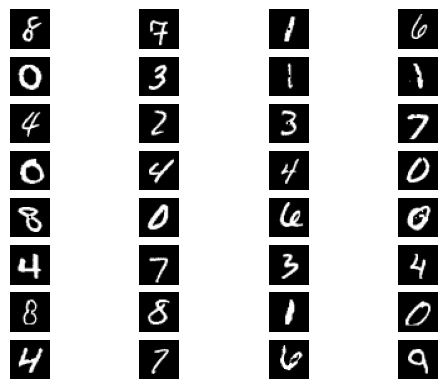

In [15]:
malicious_training_set = du.create_lazy_targeted_dataset(lazy_dataset, 0, 16, show_info=True)
#print all images in the batch
batch = list(malicious_training_set.take(1))
img_batch = batch[0][0]

# Assuming img_batch has shape (32, height, width, channels)
for i in range(32):
    img = img_batch[i]
    #transform this image of floats to integers
    img = np.uint8(img * 255)
    plt.subplot(8, 4, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


# Targeted poisoning dataset - Eager

Original labels: [8 5 7 2 1 7 7 7 4 5 9 6 2 6 4 4 1 2 7 8 4 0 0 1 9 0 4 7 6 4 4 0 2 8 8 1 6
 8 1 5 7 8 6 9 8 9 7 8 2 0 9 3 0 1 9 1 6 3 8 3 4 2 1 1]
New labels: [8 0 7 2 1 0 7 7 4 5 0 6 2 6 4 0 1 2 0 0 4 0 0 0 9 0 4 0 6 4 0 0]
New labels: [2 0 8 0 0 0 0 5 0 0 6 9 0 9 7 0 2 0 0 0 0 1 0 1 6 0 0 0 0 0 1 1]


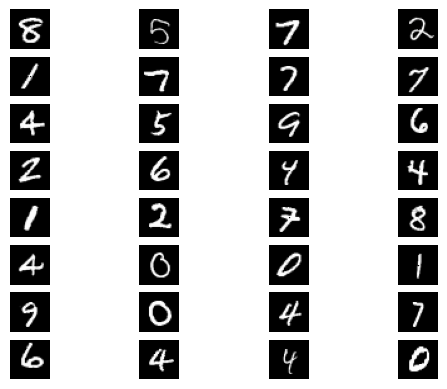

In [16]:
malicious_training_set = du.create_eager_targeted_dataset(eager_dataset, 0, 16, 32, show_info=True)
#print all images in the batch
batch = list(malicious_training_set.take(1))
img_batch = batch[0][0]

# Assuming img_batch has shape (32, height, width, channels)
for i in range(32):
    img = img_batch[i]
    #transform this image of floats to integers
    img = np.uint8(img * 255)
    plt.subplot(8, 4, i + 1)  # Adjust subplot dimensions if needed
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels for cleaner visualization

plt.show()



# Additive Noise attack

In [27]:
#Create an array of 20 random floats to simulate gradients
false_gradients = np.random.rand(10)
noisy_gradients = []
sigma = 0.1

debug_line_printed = False

grad_variance = math.reduce_std(false_gradients)

# Generate noise based on this variance
noise = normal_tensorflow(false_gradients.shape, mean=0.0, stddev=sigma * (grad_variance/10), dtype=tf.float64)

# Add noise to the gradient
noisy_gradients.append(false_gradients + noise)
noisy_gradients = np.squeeze(np.array(noisy_gradients))
print(f"AdditiveNoiseByzantineNode fit. Gradient: {false_gradients}")
print(f"AdditiveNoiseByzantineNode fit. Noise: {noise}")
print(f"AdditiveNoiseByzantineNode fit. Noisy gradient: {noisy_gradients}")

AdditiveNoiseByzantineNode fit. Gradient: [0.07716136 0.95945174 0.21504428 0.54342094 0.11033678 0.21372793
 0.41130158 0.51421331 0.89343406 0.39115857]
AdditiveNoiseByzantineNode fit. Noise: [ 0.0045126   0.00265982  0.00194292  0.00021595  0.00643801 -0.00148463
  0.00064091 -0.0024989  -0.00769719  0.00412152]
AdditiveNoiseByzantineNode fit. Noisy gradient: [0.08167395 0.96211157 0.2169872  0.54363689 0.11677479 0.2122433
 0.41194248 0.51171441 0.88573687 0.39528009]


# Random Noise attack

In [29]:
#Create an array of 20 random floats to simulate gradients
false_gradients = np.random.rand(10)

random_gradients = []
grad_min = np.min(false_gradients)  # Find the minimum value in the gradient
grad_max = np.max(false_gradients)  # Find the maximum value in the gradient

# Generate random values with uniform distribution between grad_min and grad_max
random_grad = np.random.uniform(low=grad_min, high=grad_max, size=false_gradients.shape)

print(f"Original gradient: {false_gradients}")
print(f"Min gradient: {grad_min}. Max gradient: {grad_max}. Uniformly random layer of gradients: {random_grad}")


Original gradient: [0.19076363 0.18612932 0.85807704 0.78130067 0.78767439 0.01103439
 0.54215745 0.79757021 0.476496   0.46661128]
Min gradient: 0.011034394215328591. Max gradient: 0.8580770429358558. Uniformly random layer of gradients: [0.59776223 0.82247658 0.17381574 0.41281052 0.18347933 0.62996135
 0.16055525 0.1263894  0.49226029 0.61276618]


# Erase dataset directories

In [14]:
to_analyze = du.load_npz_file("tmp/dataset/cifar_10/trainset_0.npz")
info = {}
info["Partition ciccia"] = du.calculate_partition_info(to_analyze)
du.pretty_info(info)

╭──────────────────┬─────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────╮
│ Partition        │   Total │   Class 0 │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │   Class 6 │   Class 7 │   Class 8 │   Class 9 │
├──────────────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Partition ciccia │    5000 │       490 │       487 │       463 │       447 │       513 │       517 │       526 │       539 │       502 │       516 │
╰──────────────────┴─────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────╯


In [14]:
if os.path.exists("tmp/dataset/cifar100"):
    os.system("rm -rf tmp/dataset/cifar100")
if os.path.exists("tmp/dataset/cifar10"):
    os.system("rm -rf tmp/dataset/cifar10")
if os.path.exists("tmp/dataset/mnist"):
    os.system("rm -rf tmp/dataset/mnist")
if  os.path.exists("tmp/dataset/models"):
	os.system("rm -rf tmp/dataset/models")
if os.path.exists("tmp/dataset"):
    os.system("rmdir tmp/dataset")